In [0]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
%tensorflow_version 2.x

In [0]:
# Import necessary packages
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

We can create machine learning models in two ways using Tensorflow.js:

1.   Using Layers API 
2.   Using Core API (low-level operations)

We build our Simple Linear Regression Model using the sequential model of the layers API, which is the simplest model in Keras and consists of a few layers. 

In [0]:
# Create the simple linear regression model
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  # Create the topography of the model.Simple liner regression consists of one 
  # node in one layer 
  model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))
  # Modify the model so that tensorflow can run it. Specify the loss function
  # as mean squared error
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model  

# Train the model
def train_model(model, feature, label, epochs, batch_size):
  # Pass the feature and label values to the model. 
  history = model.fit(x=feature, y=label, batch_size=None, epochs=epochs)
  # Keep the weight and bias of the trained model
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  # Keep the list of epoch
  epochs = history.epoch
  # Keep the history of each epoch
  hist = pd.DataFrame(history.history)
  # Keep the root mean square of each epoch
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse

In [0]:
# Plot the model
def plot_the_model(trained_weight, trained_bias, feature, label):
  plt.xlabel("feature")
  plt.ylabel("label")
  plt.scatter(feature, label)
  # Show the model as red line
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()

# Plot the loss curve
def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

In [0]:
# Create the dataset
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [0]:
# Assign the hyperparameters
learning_rate = 0.01
epochs = 10
my_batch_size = 12

In [8]:
# Build the model 
my_model = build_model(learning_rate)

# Train the model
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 655.5949 - root_mean_squared_error: 25.6046
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 642.3038 - root_mean_squared_error: 25.3437
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 632.7932 - root_mean_squared_error: 25.1554
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 624.9075 - root_mean_squared_error: 24.9981
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 617.9643 - root_mean_squared_error: 24.8589
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 611.6472 - root_mean_squared_error: 24.7315
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 605.7800 - root_mean_squared_error: 24.6126
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 600.2535 - root_mean_squared_error: 24.5001
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 594.9944 - root_me

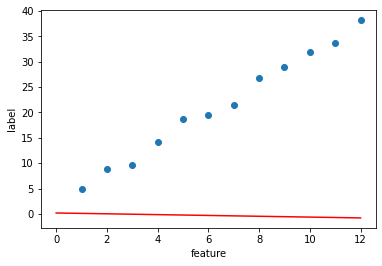

In [9]:
# Plot the model
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

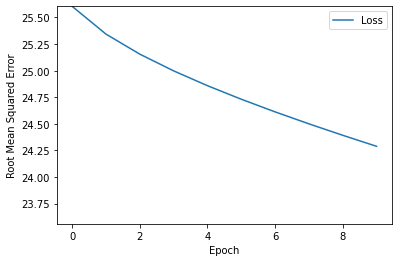

In [10]:
# Plot the loss curve
plot_the_loss_curve(epochs, rmse)

**Task 1: Examine the graphs**

Blue dots show the actual data whereas red line shows the predictions. From the first plotting, we see that actual data and predictions do not align.
From the second plotting, we see that loss curve has not converged yet, which shows that our model is not sufficiently trained. 

**Task 2: Increase the number of epochs**

We can increase the number of epochs for the loss curve to converge.


Epoch 1/400
1/1 [==============================] - 0s 1ms/step - loss: 846.5174 - root_mean_squared_error: 29.0950
Epoch 2/400
1/1 [==============================] - 0s 1ms/step - loss: 831.4043 - root_mean_squared_error: 28.8341
Epoch 3/400
1/1 [==============================] - 0s 1ms/step - loss: 820.5718 - root_mean_squared_error: 28.6456
Epoch 4/400
1/1 [==============================] - 0s 1ms/step - loss: 811.5796 - root_mean_squared_error: 28.4882
Epoch 5/400
1/1 [==============================] - 0s 2ms/step - loss: 803.6541 - root_mean_squared_error: 28.3488
Epoch 6/400
1/1 [==============================] - 0s 1ms/step - loss: 796.4370 - root_mean_squared_error: 28.2212
Epoch 7/400
1/1 [==============================] - 0s 1ms/step - loss: 789.7285 - root_mean_squared_error: 28.1021
Epoch 8/400
1/1 [==============================] - 0s 1ms/step - loss: 783.4046 - root_mean_squared_error: 27.9894
Epoch 9/400
1/1 [==============================] - 0s 2ms/step - loss: 777.3826 

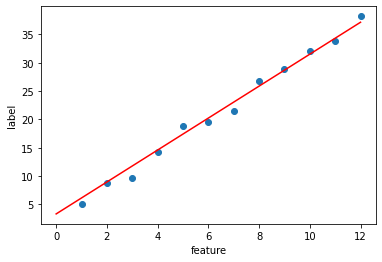

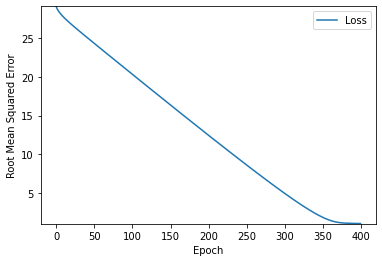

In [15]:
learning_rate=0.01
epochs= 400 
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

**Task 3: Increase the learning rate**

Increasing learning rate also helps for the model to converge more quickly. However, setting it to a really high value causes the loss curve to oscillate. Run the below code to see the effect of a high learning rate. 

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 189.9532 - root_mean_squared_error: 13.7824
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 6745062.5000 - root_mean_squared_error: 2597.1257
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 189.0596 - root_mean_squared_error: 13.7499
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 1.5997 - root_mean_squared_error: 1.2648
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9364 - root_mean_squared_error: 0.9677
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9244 - root_mean_squared_error: 0.9614
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.9210 - root_mean_squared_error: 0.9597
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9179 - root_mean_squared_error: 0.9581
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9148 - root_mean

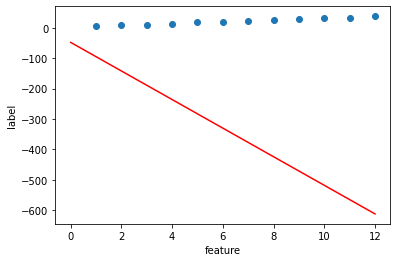

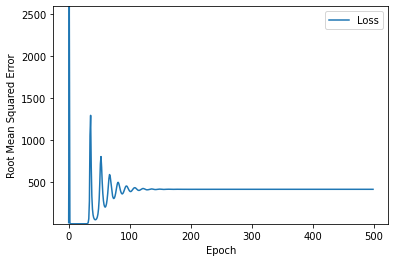

In [12]:
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

**Task 4: Find the ideal combination of epochs and learning rate**

Finding the ideal combination of epochs and learning rate is possible by trying a few  values. 

Epoch 1/70
1/1 [==============================] - 0s 2ms/step - loss: 682.3317 - root_mean_squared_error: 26.1215
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 504.8849 - root_mean_squared_error: 22.4696
Epoch 3/70
1/1 [==============================] - 0s 2ms/step - loss: 400.7093 - root_mean_squared_error: 20.0177
Epoch 4/70
1/1 [==============================] - 0s 2ms/step - loss: 326.5666 - root_mean_squared_error: 18.0712
Epoch 5/70
1/1 [==============================] - 0s 1ms/step - loss: 269.6271 - root_mean_squared_error: 16.4203
Epoch 6/70
1/1 [==============================] - 0s 1ms/step - loss: 224.1165 - root_mean_squared_error: 14.9705
Epoch 7/70
1/1 [==============================] - 0s 2ms/step - loss: 186.8693 - root_mean_squared_error: 13.6700
Epoch 8/70
1/1 [==============================] - 0s 1ms/step - loss: 155.9312 - root_mean_squared_error: 12.4872
Epoch 9/70
1/1 [==============================] - 0s 2ms/step - loss: 129.9939 - root_me

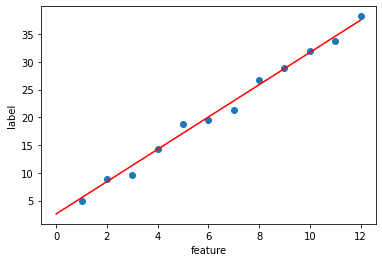

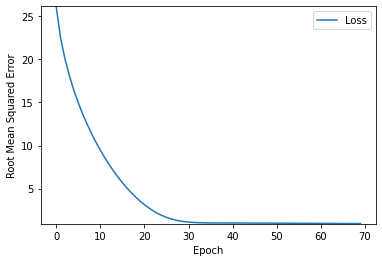

In [13]:
learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

**Task 5: Adjust the batch size**

The terms batch size, epoch and iteration can seem a little confusing but they are very easy to understand. 

In gradient descent optimization, loss is calculated iteratively, and weights&bias are updated accordingly. This is done after each batch is processed. Our data has 12 data points. If the batch size is 12, we only have 1 batch, meaning that loss is calculated after all examples are trained, which means we have 1 iteration. 

It the batch size is 6, we have 2 batches. Loss is calculated after each 6 examples are trained. That means, loss and weights are calculated twice. Because they are calculated twice, we have 2 iterations. 

In machine learning, we need to pass the entire dataset through our model more than once. An epoch is when the entire dataset is trained. When it is 100, we train our model using the entire data 100 times. 

Let's go back to the batch size. As with the other hyperparameters, we need to find an ideal value of batch size. Setting it to a high value (12) makes the training process slower whereas setting it to a low value does not give enough information to the model, which can cause noises in each batch since small batches will not represent the whole data. 

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 925.6721 - root_mean_squared_error: 30.4249
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 847.9997 - root_mean_squared_error: 29.1204
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 794.9060 - root_mean_squared_error: 28.1941
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 752.3317 - root_mean_squared_error: 27.4287
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 715.8943 - root_mean_squared_error: 26.7562
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 683.5788 - root_mean_squared_error: 26.1453
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 654.2692 - root_mean_squared_error: 25.5787
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 627.2753 - root_mean_squared_error: 25.0455
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 602.1362 

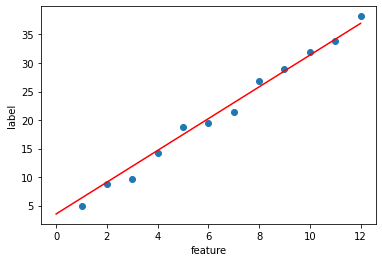

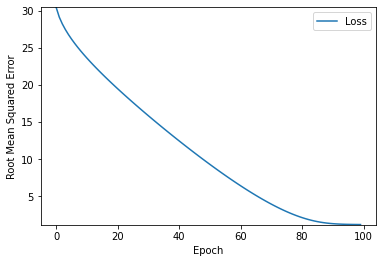

In [14]:
learning_rate=0.05
epochs=100
my_batch_size=1  

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

References: 
*   https://developers.google.com/machine-learning/crash-course
*   https://www.tensorflow.org/js/guide/models_and_layers

